# Text mining and Image Recognition: Laboratorio 1
#### Ruben Gonzalez 20003314

In [10]:
import cv2
import numpy as np
import sys
import math

import matplotlib.pyplot as plt

In [2]:
def PlotImagen(nombre, grises = True):
    img = cv2.imread(nombre)
    if grises == True:
        #img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show

### Problema #1:
Utilice realice una comparacion entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparacion entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

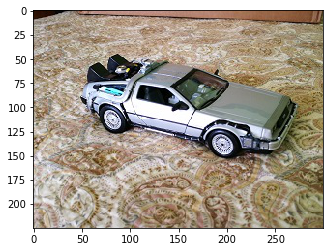

In [3]:
#Imagen a usar
PlotImagen('carro.jpg')

#### Ejemplos de los 3 filtros

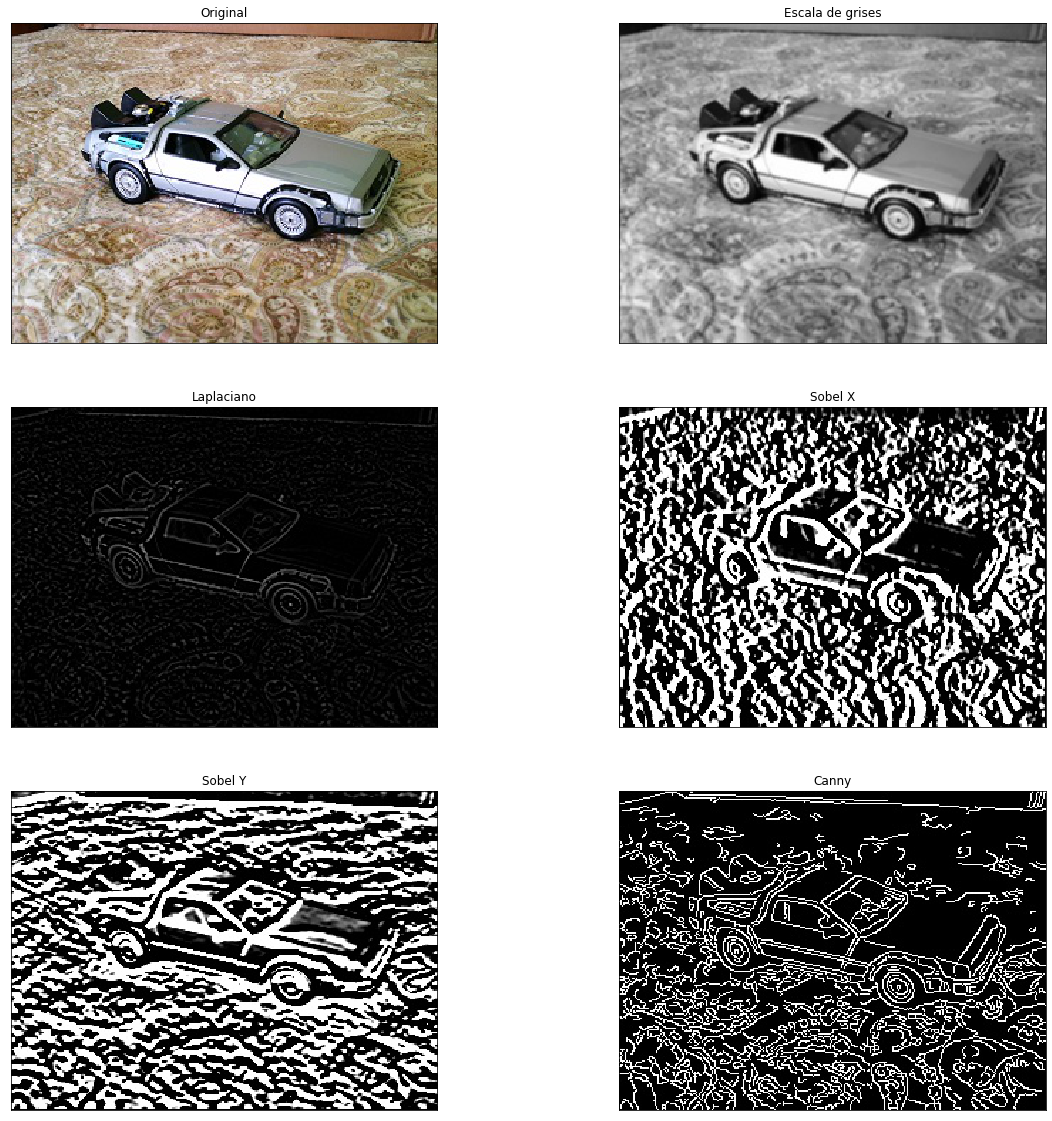

In [4]:
#Cargamos la imagen
img0 = cv2.imread('carro.jpg',)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

#La convertimos a escala de grises
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

#Quitamos el ruido
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
edges = cv2.Canny(img, 100, 200)

#Crear Imagenes
cv2.imwrite('canny_out_carro.jpg', edges)
cv2.imwrite('laplacian_out_carro.jpg', laplacian)
cv2.imwrite('sobelx_out_carro.jpg', sobelx)
cv2.imwrite('sobely_out_carro.jpg', sobely)
cv2.imwrite('gray_out_carro.jpg', img)

#Imagenes recuperadas de disco
img_Canny = cv2.imread('canny_out_carro.jpg')
img_Canny = cv2.cvtColor(img_Canny, cv2.COLOR_BGR2RGB)

img_Sobelx = cv2.imread('sobelx_out_carro.jpg')
img_Sobelx = cv2.cvtColor(img_Sobelx, cv2.COLOR_BGR2RGB)

img_Sobely = cv2.imread('sobely_out_carro.jpg')
img_Sobely = cv2.cvtColor(img_Sobely, cv2.COLOR_BGR2RGB)

img_Lap = cv2.imread('laplacian_out_carro.jpg')
img_Lap = cv2.cvtColor(img_Lap, cv2.COLOR_BGR2RGB)

img_Gray = cv2.imread('gray_out_carro.jpg')
img_Gray = cv2.cvtColor(img_Gray, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20,20))

plt.subplot(3,2,1),plt.imshow(img0)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,2),plt.imshow(img_Gray)
plt.title('Escala de grises'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,3),plt.imshow(img_Lap)
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,4),plt.imshow(img_Sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5),plt.imshow(img_Sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,6),plt.imshow(img_Canny)
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

#### Tabla comparativa de los 3 metodos:
<img src="FiltrosTabla.PNG">

### Problema #2:
Investigue cual es la diferencia entre un borde y un contorno en OpenCV, posteriormente a esto, determine los bordes y contornos de una misma imagen, para este ejercicio debera entregar un documento con la descripcion de la diferencia entre ambos enfoques y el resultado de obtener ambos resultados para cualquier imagen que usted desee.


Bordes de una imagen se refiere a aquellas líneas que definen un objeto dentro de una imágen, tal y como vimos en el resultado de Canny del problema anterior mientras que el contorno de una imágen se refiere más a la jerarquización de aquellos bordes detectados en una imagen de tal forma que aquellos que tienen la misma intensidad son parte de una misma jerarquia.

A continuacion se muestra un ejemplo de deteccion de contornos, dado que arriba se mostro la deteccion de bordes de la imagen ya no se volvera a calcular

Numero de contornos encontrados = 287


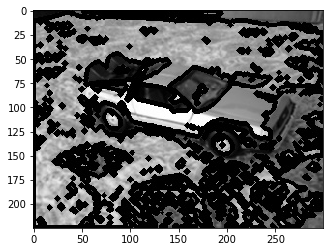

In [7]:
#Aplicacion del metodo de deteccion de contornos
ret, thresh = cv2.threshold(img, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Numero de contornos encontrados = " + str(len(contours))) 
  
# Dibujar todos los contornos
# -1 es un parametro para pedir que se dibujen todos los contornos
cv2.drawContours(img, contours, -1, (0, 255, 0), 3) 

#Crear Imagenes
cv2.imwrite('contours_out_carro.jpg', img)

#MostrarImagen
PlotImagen('contours_out_carro.jpg')

Antes de llamar al metodo findContours es necesario realizar binarizar la imagen o aplicar deteccion de bordes por Canny. Luego de eso el metodo devuelve 3 valores, la imagen nueva con los contornos, una lista de los contornos detectados y las jerarquias generadas a partir de esos contornos. Para una mejor comprension, estos contornos se dibujan en la imagen base y se pueden distinguir de mejor forma.

### Problema #3:
Dadas las imagenes en la carpeta llamada ¸campos utilice la transformada de Hough para dibujar la mayor cantidad de lineas rectas posibles en cada imagen, para este ejercicio puede utilizar las funciones de OpenCV disponibles sobre la transformada de Hough.

In [31]:
def trans_Hough(nombre):
    gray = cv2.imread(nombre+'.jpg')
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    
    grayStd=gray
    grayP=gray
    
    #Quitamos el ruido
    gray = cv2.GaussianBlur(gray,(3,3),0)
    
    #Obtenemos Canny
    edges = cv2.Canny(gray, 100, 200)
    
    #Obtener lineas por el metodo estandar
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(grayStd, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

    #Obtener lineas por el metodo probabilistico
    linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(grayP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

    #Crear Imagenes
    cv2.imwrite('Hough_Std_out_'+nombre+'.jpg', grayStd)
    cv2.imwrite('Hough_Prob_out_'+nombre+'.jpg',grayP)

    #Recuperar imagenes de disco
    imgStd = cv2.imread('Hough_Std_out_'+nombre+'.jpg')
    imgStd = cv2.cvtColor(imgStd, cv2.COLOR_BGR2RGB)

    imgP = cv2.imread('Hough_Prob_out_'+nombre+'.jpg')
    imgP = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)

    #Mostrar resultados
    plt.figure(figsize = (20,20))

    plt.subplot(1,2,1),plt.imshow(imgStd)
    plt.title('Transformada Hough Estandar'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,2,2),plt.imshow(imgP)
    plt.title('Transformade Hough Probabilistica'), plt.xticks([]), plt.yticks([])

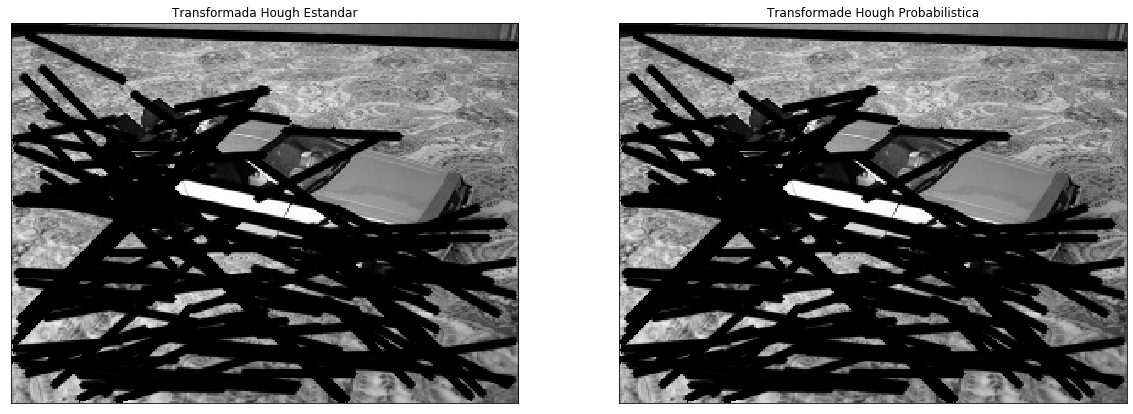

In [32]:
trans_Hough('carro')

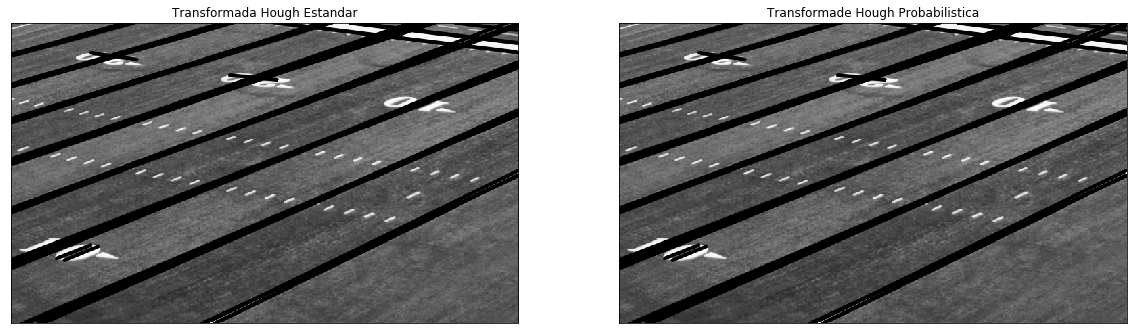

In [33]:
#Aplicando en imagenes de los campos
trans_Hough('campo1')

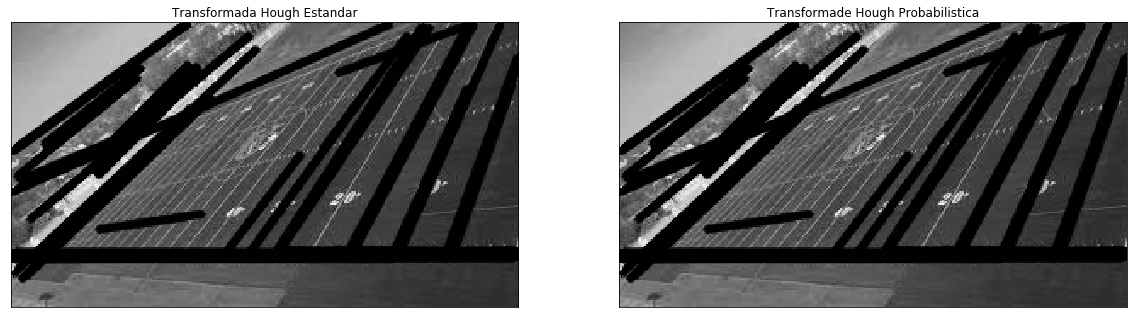

In [34]:
trans_Hough('campo2')

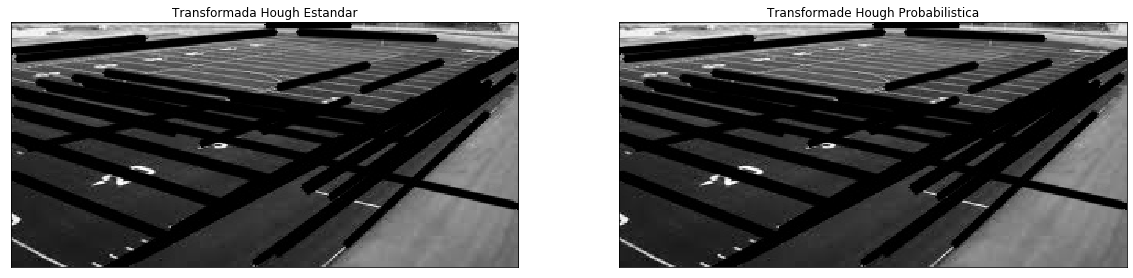

In [36]:
trans_Hough('campo3')